In [130]:
%matplotlib widget

In [186]:
import numpy as np
from numpy import pi
from sympy import symbols, integrate, solve, latex, simplify, exp, I
from IPython.display import display, Math
from pandas import DataFrame
from plotly.express import line, scatter


h = 4.136 * 10**(-15) # in eV*s
h_bar = h/(2*pi) # in eV/Hz
m_e = 9.109 * 10**(-31) # in kg
c = 299792458 #in m/s
q = 1.6022*10**(-19)

# 1.
Assume that $\varphi_n \left(x \right)$ are the eigenfunctions in an infinite square well $( \rightarrow\infty \text{ for } x<0 \text{ and } x>a)$. Calculate the overlap integrals
$\int_{0}^{a}{{\varphi_n}^\ast\left(x\right)\varphi_m\left(x\right)dx.}$

(Hint: The eigenfunctions to different eigenvalues are supposed to be orthogonal). (434: 6 pts, 591: 4 pts)


In quantum mechanics, eigenfunctions (AKA eigenstates) represent states corresponding to physically measurable values, (where the measured values are the eigenvalues).  That is, they each correspond to a single solution to the Schrodinger equation, the superposition of which gives the wavefunction.  But since we never observe an individual particle to be in a superposition of states, only ever in a single state at once (although measuring many particles with the same wavefunction reproduces the superposition), it's necesarry that eigenstates with different eigenvalues be mutually exclusive, which requires they be mutually orthogonal.  Hence, there can be no nonzero overlap between eigenstates with different eigenvalues.  For eigenstates with the same eigenvalue, the overlap will of course be 1 or 100%.

# 2.
For an infinite potential well of width $15$ nm, compute the energies associated with the transitions between the five lowest levels. Give the answers in eV. (434: 10 pts, 591: 5 pts)

For a particle trapped in an infinite square well, the energy level is quantized due to the boundary conditions applies to the Schrodinger equation.  The energy levels are given by the equation:
$E_n = \frac{\hbar^2 n^2 \pi^2}{2mw^2}$

In [132]:
def infinite_well_energy_transition(n2, n1):
  w = 15 * 10**(-9)
  def infinite_well_energy(n):
    return (h_bar**2 * n**2 * pi**2)/(2 * m_e * w**2) #using regular electron mass,
                                                      #since problem doesn't specify particle type
  return infinite_well_energy(n2) - infinite_well_energy(n1)

transitions = ['5-4', '4-3', '3-2', '2-1']
for i in range(0,4):
  E_0 = infinite_well_energy_transition(5 - i, 4 - i) * 1.602 * 10 ** (-19)
  #times 1.6022*10^(-19) to convert hbar to be in terms of Joules then the answer back to eV
  display(Math(f'\Delta E_n({transitions[i]}) = '
               f'{round(E_0, 3)}\\text{{ eV}} = '
               f'{round(10 ** (3) * E_0, 3)} \\text{{ meV}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 3.
a.
For a finite potential well of width 20 nm and height 0.2 eV (use an effective mass appropriate to GaAs electrons, m = 0.067m0), compute the energy needed to ionize an electron (move it from the lowest energy level to the top of the well).

b.
If a 0.3 eV photon excites the electron out of the well, what is its kinetic energy? What is its wavelength? (434: 12 pts, 591: 8 pts)

a.
Inside a finite well, a particle has the wavefunction

$\psi(x)_1 = D\cos(lx) \tag{1}$

where

$l = \frac{\sqrt{2m(V_0 - E)}}{\hbar} \tag{2}$.

Outside the well,

<p>$\psi(x)_2 = F\exp(-kx) \tag{3}$</p>

where

$k = \frac{\sqrt{2mE}}{\hbar} \tag{4}$.


Since the wavefunction and its derivative must be continuous, we set $\psi(w)_1 = \psi(w)_2$ and $\psi'(w)_1 = \psi'(w)_2$, which gives:

<p>$D\cos(lw) =  F\exp(-kw)\tag{5}$</p>

and

<p>$-lD\sin(lw) =  -kF\exp(-kw)\tag{6}$</p>

Deviding (5) by (6) gives:

<p>$k = l\tan(lw)\tag{7}$</p>

Since $k$ and $l$ are both functions of $E$, we can find the allowed energy values from this equation.  However, it's not convenient to have two separate functions of $E$.  Instead, following the derivation used in Griffiths' *Quantum Mechanics* in section 2.6, set:


<p>$z = lw \tag{8}$</p> 
    
    
<p>$((7) \text{ and } (8) \implies \tan z = \frac{k}{l} \tag{9})$</p>

and

$z_0 = \frac{w}{\hbar}\sqrt{2mV_0}\tag{10}$.

Additionally, from the definitions of $k$ and $l$ it follows that

$k^2+l^2 = \frac{2mV_0}{\hbar^2} \implies k = \sqrt{\frac{2mV_0}{\hbar^2} - l^2} = \sqrt{\left(\frac{z_0}{w}\right)^2 - \left(\frac{z}{w}\right)^2} \implies kw = \sqrt{z_0^2 - z^2}\tag{11}$.

$(11) \text{ and } (9) \implies \tan z =\sqrt{\left(\frac{z_0}{z}\right)^2-1} \tag{12}$

Now, solving for $E$ in (2) and multiplying by $w$ to get it in terms of $z$ instead of $l$, we get that

<p>$ E = V_0 - \frac{z^2\hbar^2}{2mw^2} \tag{13}$</p>

Now I'll find the solutions for $z$ by plotting the roots of equation 12 and then compute the energy difference between the highest and lowest energy levels.

In [143]:
m = m_e*0.067
V_0 = 0.2 * 1.602*10**(-19) #in Joules
w = 0.5 * 20 * 10**(-9) #in meters
z_0 = (w/((h_bar*1.6022*10**(-19)))) * (2*m*V_0)**0.5
z_0

5.929480085495967

Plotting equation 12 in Desmos with the relevant value of $z_0$, the smallest positive root is at around $z=1.342$.  

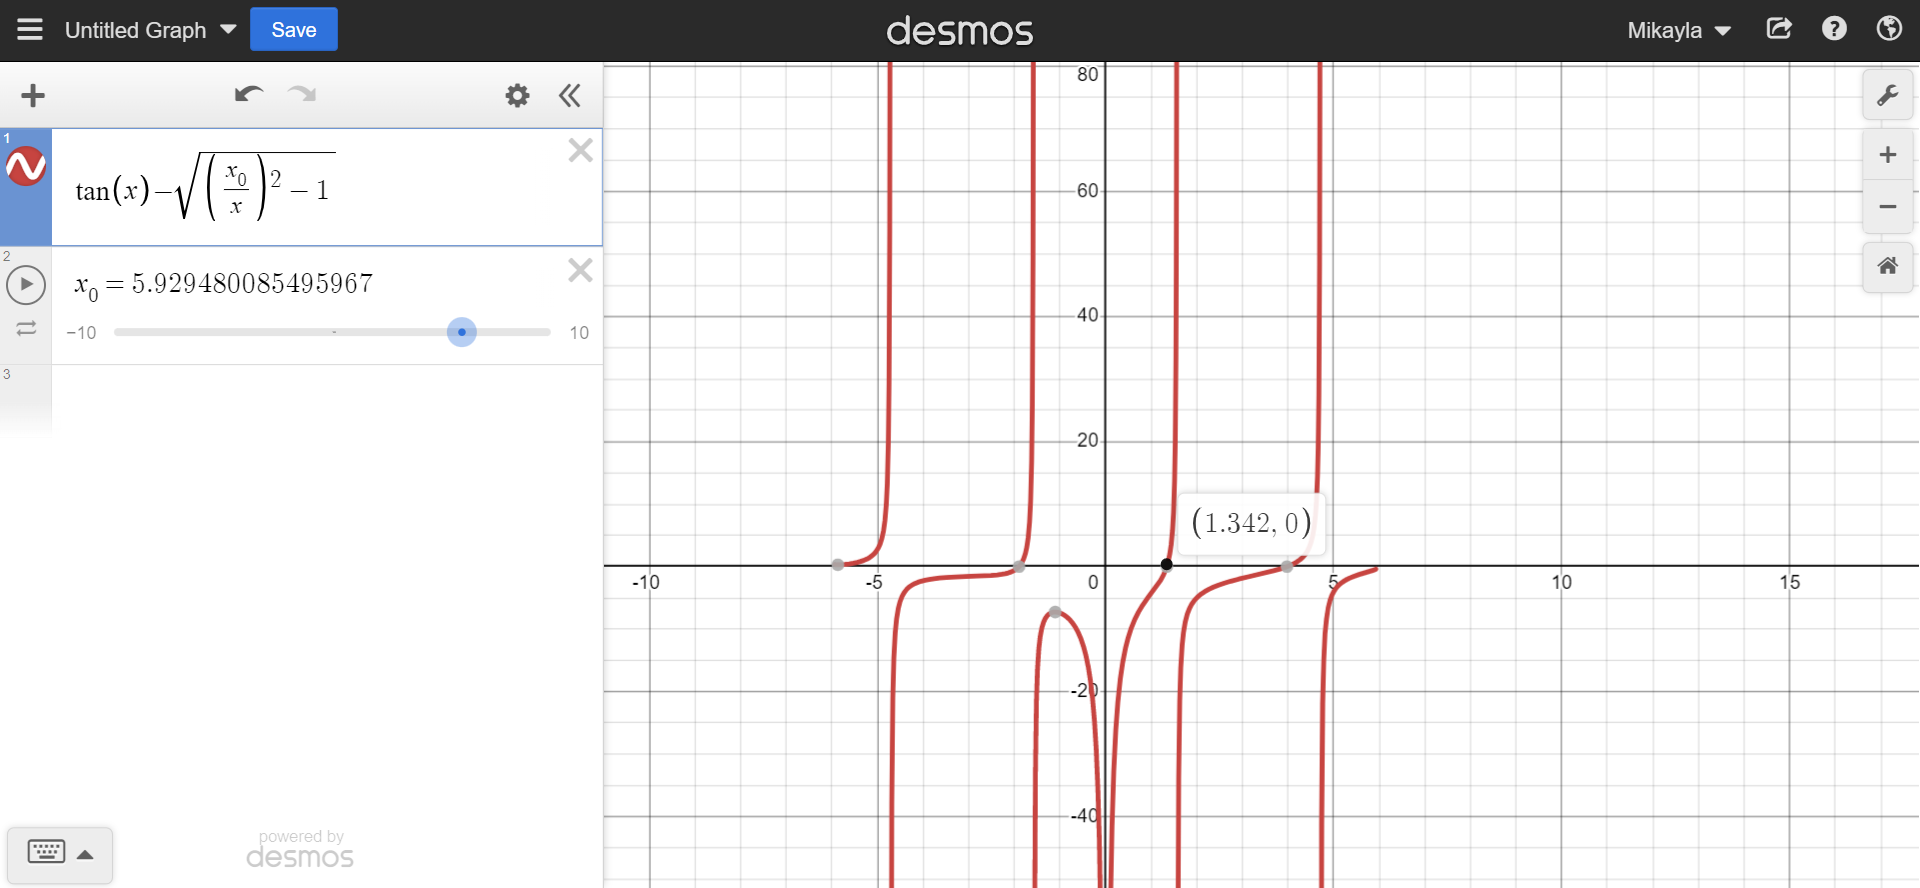

To escape the well the electron energy needs to reach $V_0$, hence the ionization energy is given by equation 13:

In [181]:
def finite_well_energy(z):
  return ((z**2 * h_bar**2)/(2 * m * w**2))*1.6022*10**(-19)

E_0 = round(finite_well_energy(1.342), 5)

display(Math(f'E_0 = {E_0} \\text{{ eV}} = {round(E_0 * 10 ** 3, 4)} \\text{{ meV}}'))

E_ionization = 0.2 - E_0

display(Math(f'E_\\text{{ionization}} = V_0 - E_0 = {E_ionization} \\text{{ eV}} = {round(E_ionization * 10 ** 3, 4)} \\text{{ meV}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

b.
Since the electron needs only an additional $189.76$ meV to escape the well the remaining energy absorbed from the photon will be $300 - 189.76 = 110.24\text{ meV}$.

For a matter wave, the De Broglie equation for wavelength is $\lambda = \frac{h}{\sqrt{2mE}}$.

In [190]:
display(Math(f'E_\\text{{k}} = 110.24 \\text{{ meV}}'))
display(Math(f'\\lambda = {round(((h*q/(2*m*0.11024*q)**0.5)) * 10**9, 3)} \\text{{ nm}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>